# Trenujemy klasyfikator dla Irysów

In [2]:
from pycaret.classification import setup as cls_setup, compare_models as cls_compare_models, finalize_model as cls_finalize_model, predict_model as cls_predict_model, plot_model as cls_plot_model, save_model as cls_save_model
from pycaret.regression import setup as reg_setup, compare_models as reg_compare_models, finalize_model as reg_finalize_model, predict_model as reg_predict_model, plot_model as reg_plot_model, save_model as reg_save_model
from pycaret.datasets import get_data
import pandas as pd
from IPython.display import Markdown, display

## Wyświetlenie wszystkich dostępnych zbiorów danych

In [3]:
dataset_df = get_data('index', verbose=False)
dataset_df

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


In [4]:
df = get_data('titanic')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Ilość rekordów

In [14]:
len(df)

891

### Brakujące wartości

In [51]:
df['Embarked'].isnull().sum() / len(df['Embarked']) *100

0.22446689113355783

## Setup

In [5]:
target_column = 'Survived'
cls_setup(data=df, target=target_column, session_id=123, verbose=False)
#reg_setup(data=df, target='petal_width', session_id=123, verbose=False)

# Sprawdzenie czy to model: REGRESJI czy KLASYFIKACJI
if target_column:
    if (pd.api.types.is_numeric_dtype(df[target_column])) and (df[target_column].nunique() > 10):
        display(Markdown('## Mamy do czynienia z problemem: **Regresji**'))
    else:
        display(Markdown('## Mamy do czynienia z problemem: **Klasyfikacji**'))

## Mamy do czynienia z problemem: **Klasyfikacji**

## Compare Models

In [6]:
best_model = cls_compare_models(exclude=['knn', 'svm', 'gpc', 'nb'])
#best_model = reg_compare_models(exclude=['knn', 'svm', 'gpr', 'et', 'en'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8056,0.8692,0.6739,0.7883,0.7228,0.5758,0.5825,1.7720
ridge,Ridge Classifier,0.7528,0.8647,0.4522,0.8257,0.5793,0.4273,0.4679,0.0700
et,Extra Trees Classifier,0.7400,0.0000,0.4774,0.7654,0.5815,0.4088,0.4356,0.1520
lda,Linear Discriminant Analysis,0.6260,0.5382,0.0348,0.0800,0.0485,0.0335,0.0389,0.0650
dt,Decision Tree Classifier,0.6164,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0890
rf,Random Forest Classifier,0.6164,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1780
qda,Quadratic Discriminant Analysis,0.6164,0.5166,0.0000,0.0000,0.0000,0.0000,0.0000,0.0700
ada,Ada Boost Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0690
gbc,Gradient Boosting Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1240
lightgbm,Light Gradient Boosting Machine,0.6164,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0930


Processing:   0%|          | 0/45 [00:00<?, ?it/s]

## Evaluate Models

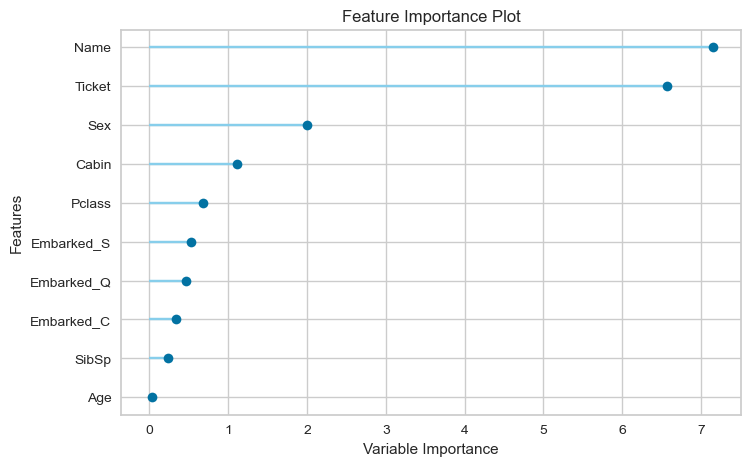

In [11]:
cls_plot_model(best_model, plot='feature')
#reg_plot_model(best_model, plot='feature')

# Finalize Model and Save

In [16]:
final_model = cls_finalize_model(best_model)
#final_model = reg_finalize_model(best_model)
cls_save_model(final_model, 'iris_classification_pipeline')
#reg_save_model(final_model, 'iris_regression_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['sepal_length', 'sepal_width',
                                              'petal_length', 'petal_width'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empt...
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                         